# Assignment 2: Probability Sampling and Pandas

#### **Author** : Alexandre Makhmudyantsev

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** below.

####  **Collaborators**: None

## Necessary Imports

In [1]:
from scipy import special
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Scoring Breakdown

|Question|Points|
|---|---|
|1|30|
|2|10|
|3|10|
|4|10|
|5|40|
|**Total**|100|

# Part 1: Probability

## Question 1

1.1. Suppose you sample 100 times at random with replacement from a population in which 26% of the individuals are successes. Write a Python expression that evaluates to the chance that the sample has 20 successes. 


One way to compute the *binomial coefficients* $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ is to use the `SciPy` module `special`. `SciPy` is a collection of Python-based software for math, probability, statistics, science, and engineering.

Hint 1:`special.comb(n, k)` evaluates to $\binom{n}{k}$. 

Hint 2: `special.factorial(n)` evaluates to $n!$.

In [2]:
# Initialize given sample size
n = 100

# Initialize number of successes
k = 20

# Initialize probability of success
p = 0.26

# Compute the probability of 20 successes
prob_20_successes = special.comb(n, k) * (p**k) * (1-p)**(n-k)

print(prob_20_successes)

0.036911003560024636


1.2. Complete the cell with a Python expression that evaluates to an array whose elements are the chances of $k$ successes for $k = 0, 1, 2, \ldots, 100$. That is, `all_probs[k]` should contain $P(X = k)$, where $X$ is the random variable describing the number of successes drawn from the scenario outlined above.

In [3]:
# Initialize an array to store the probabilities of k successes
all_probs = np.zeros(n+1)

# Loop over all possible number of successes from 0 to n (inclusive)
for k in range(n+1):

    # Compute the probability of k successes using the binomial formula
    all_probs[k] = special.comb(n, k) * (p**k) * ((1-p)**(n-k))

print(all_probs)

[8.37860995e-14 2.94383593e-12 5.11988762e-11 5.87633949e-10
 5.00680006e-09 3.37756026e-08 1.87895807e-07 8.86519986e-07
 3.62095494e-06 1.30049913e-05 4.15808236e-05 1.19532097e-04
 3.11483416e-04 7.40825421e-04 1.61751651e-03 3.25834857e-03
 6.08188374e-03 1.05586916e-02 1.71063488e-02 2.59393567e-02
 3.69110036e-02 4.94046894e-02 6.23324522e-02 7.42715705e-02
 8.37227951e-02 8.94249963e-02 9.06334422e-02 8.72766481e-02
 7.99474315e-02 6.97397911e-02 5.79908353e-02 4.60084221e-02
 3.48560427e-02 2.52356608e-02 1.74723852e-02 1.15762984e-02
 7.34382295e-03 4.46315609e-03 2.59980430e-03 1.45214294e-03
 7.78073886e-04 4.00064358e-04 1.97457762e-04 9.35783487e-05
 4.25930936e-05 1.86232866e-05 7.82353108e-06 3.15820519e-06
 1.22522713e-06 4.56841443e-07 1.63722096e-07 5.63960584e-08
 1.86716680e-08 5.94141806e-09 1.81692014e-09 5.33915598e-10
 1.50743545e-10 4.08844512e-11 1.06497708e-11 2.66366234e-12
 6.39518931e-13 1.47341535e-13 3.25641491e-14 6.90119677e-15
 1.40180559e-15 2.727837

1.3. Complete the cell with an expression that evaluates to the chance that the number of successes in the sample is in the interval $26 \pm 10$ (inclusive on both sides). In other words, determine $P(16 \leq X \leq 36)$. **Hint: You might want to apply your Python indexing knowledge here.**

In [4]:
# Sum the probabilities from the interval 16 to 36
prob_interval = np.sum(all_probs[16:37])

print(prob_interval)

0.9838345682140125


## Question 2
Consider a sample of size $n$ drawn at random with replacement from a population in which a proportion $p$ of the individuals are called successes.

Let $S$ be the random variable that denotes the number of successes in our sample. (As stated above, $S$ follows the binomial distribution.) Then, the probability that the number of successes in our sample is **at most** $s$ (where $0 \leq s \leq n$) is

$$P(S \leq s) = P(S = 0) + P(S = 1) + ... + P(S = s) = \sum_{k=0}^s \binom{n}{k}p^k(1-p)^{n-k}$$

We obtain this by summing the probability that the number of successes is exactly $k$, for each value of $k = 0, 1, 2, ..., s$.


Please fill in the function `prob_at_most` which takes $n$, $p$, and $s$ and returns $P(S \le s)$ as defined above. If the inputs are invalid: for instance, if $p > 1$ OR $s > n$ then return 0." 

In [5]:
def prob_at_most(n, p, s):
    """ 
    Calculate the cumulative probability of obtaining at most `s` successes in 
    a sample of size `n` drawn with replacement, given success probability `p`.
    

    Parameters:
    - n (int) : Sample size.
    - p (float) : Probability of success for an individual trial. Value should be between 0 and 1.
    - s (int) L Number of successes at most
    """
    # Check for invalid input values
    if p > 1 or s > n:
        return 0

    # Calculate the cumulative binomial probability for successes from 0 to `s`
    cumulative_prob = sum([special.comb(n, k) * (p**k) * ((1-p)**(n-k)) for k in range(s+1)])

    return cumulative_prob


## Question 3

In an election, supporters of Candidate C are in a minority. Only 45% of the voters in the population favor the candidate.

Suppose a survey organization takes a sample of 200 voters at random with replacement from this population. Use `prob_at_most` to write an expression that evaluates to the chance that a majority (more than half) of the sampled voters favor Candidate C.

In [6]:
# Calculate the probability of getting more than 100 successes in a sample of 200 with a success rate of 45%.
print(1- prob_at_most(200, .45,100))

0.06807524986263847


# Part 2: Pandas
## Question 4
For the following DataFrame (fruit_info), add a column by d['new column name'] = ... and assigning a list or array of values to the column. Add a column of integers containing 1, 2, 3, and 4 called rank1 to the fruit_info table which expresses your personal preference about the taste ordering for each fruit (1 is tastiest; 4 is least tasty).


In [7]:
# Initialize a fruit into dataframe which contains the fields fruit and color
fruit_info = pd.DataFrame(
    data={'fruit': ['apple', 'orange', 'banana', 'raspberry'],
          'color': ['red', 'orange', 'yellow', 'pink']
          })

# Display the fruit info dataframe
fruit_info

,fruit,color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


In [8]:
# To the fruit info dataframe add a field called rank1 and assign each fruit in the dataframe a rank
fruit_info["rank1"] = '1', '2', '3', '4'

# Display the fruit into dataframe
fruit_info

,fruit,color,rank1
0,apple,red,1
1,orange,orange,2
2,banana,yellow,3
3,raspberry,pink,4


## Question 5

 *Use the babyNames DataFrame and perform the following operations:*

In [11]:
#Initialize the baby names dataframe to use for the subsequent problems
baby_names_df = pd.read_csv('./data/babyNames.csv')

# Insert column 'Count (All Years)' that is sum of count of entries in each Name group
baby_names_df['Count (All Years)'] = baby_names_df.groupby('Name')['Count'].transform('sum')

# Filter by count sum and year conditions, sort, get first 3
baby_names_df[(baby_names_df['Count (All Years)'] > 3000) & (baby_names_df['Year'] == 2000)].sort_values('Name').head(3)

,State,Sex,Year,Name,Count,Count (All Years)
149391,CA,F,2000,Aaliyah,120,11566
331432,CA,M,2000,Aaron,1362,77562
149538,CA,F,2000,Abby,76,3404



##### 5.1. Find the first three names (ordered alphabetically) in Year 2000 that have larger than 3000 counts.

In [12]:
# Filter the baby names dataframe for rows where count is greater then 3000 and the years is 2000
baby_names_filtered_df = baby_names_df[(baby_names_df['Count'] > 3000) & (baby_names_df['Year'] == 2000)]

# Sort the name feild alphabetically and sample the top 3 names
baby_names_filtered_sorted_df = baby_names_filtered_df.sort_values('Name').head(3)

# Display the filtered and sorted dataframe
baby_names_filtered_sorted_df

,State,Sex,Year,Name,Count,Count (All Years)
331391,CA,M,2000,Andrew,3600,150178
331389,CA,M,2000,Anthony,3839,182492
331395,CA,M,2000,Christopher,3337,222367


5.2. Find the first four names (ordered by Year) that start with “Ma” and ends with “i”.

In [ ]:
# Filter names that start with "Ma" and end with "i"
filtered_names_df = baby_names_df[baby_names_df['Name'].str.startswith("Ma") & baby_names_df['Name'].str.endswith("i")]

# Sort by 'Year' and get the top four names
sorted_names_df = filtered_names_df.sort_values('Year').drop_duplicates(subset=["Name"]).head(4)

# Display the sorted names dataframe
sorted_names_df


,State,Sex,Year,Name,Count
229265,CA,M,1913,Masami,6
229285,CA,M,1913,Masaji,5
229627,CA,M,1914,Masayoshi,5
230814,CA,M,1917,Masayuki,5


##### 5.3. Plot the popularity of the name Hillary over time. 

<Figure size 1000x600 with 0 Axes>

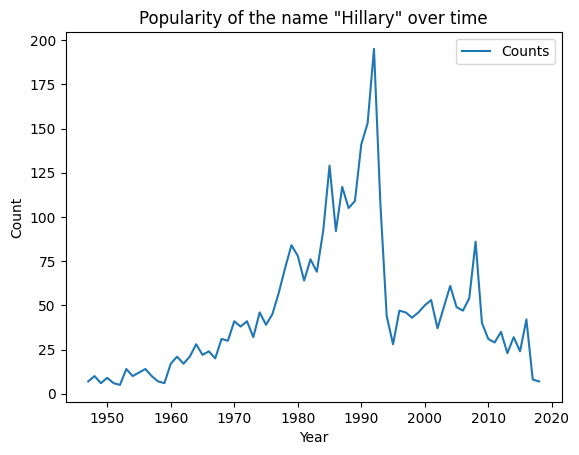

In [ ]:
# Filter rows where name is "Hillary"
hillary_df = baby_names_df[baby_names_df['Name'] == 'Hillary']

# Plot the figure
plt.figure(figsize=(10,6))
hillary_df.plot(x='Year', y='Count', kind='line', label='Counts')

# Set the plot descriptors
plt.title('Popularity of the name "Hillary" over time')
plt.xlabel('Year')
plt.ylabel('Count')

# Show the plot
plt.show()


##### 5.4. Find unisex baby names (i.e., names that are used by females and males).

In [ ]:
# Group by 'Name' and count the unique number of genders for each name
gender_counts = baby_names_df.groupby('Name')['Sex'].nunique()

# Filter names that associated with male and female gender
unisex_counts = gender_counts[gender_counts == 2]

# Convert the result into a DataFrame
unisex_names_df = unisex_counts.reset_index()
unisex_names_df.columns = ['Name', 'Number of Genders']

# Display the dataframe of all of the names (and the number of genders they are associated with)
unisex_names_df


,Name,Number of Genders
0,Aarin,2
1,Aaron,2
2,Aarya,2
3,Aaryn,2
4,Abeer,2
...,...,...
1754,Zion,2
1755,Zixuan,2
1756,Zoe,2
1757,Zuri,2
